<h2> 1. Прогнозирование с помощью линейной регрессии </h2>
В этом задании вам требуется обучить алгоритм линейной регрессии с помощью библиотеки sklearn. 

Алгоритм линейной регрессии позволяет предсказывать значения зависимой переменной (y)
 на основе независимых переменных (x0,x1,x2)
. Модель линейной регрессии имеет вид: 

y=a∗x0+b∗x1+c∗x2+d
,

где a,b,c,d
 — коэффициенты линейной регрессии, которые нужно получить в результате обучения модели. 

После обучения модели необходимо спрогнозировать значение зависимой переменной на основе новых входных данных. 

Результат сохраните в numpy-массив (ndarray) в формате:

answer: ndarrray([a,b,c,y_pred])

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

#Данные для обучения
X = np.array([[1, 1, 1], [1, 2, 2], [2, 2, 3], [2, 3, 5]])

#Значения функции
y = np.array([9, 14, 18, 26])

#Значение переменных для прогноза функции y_pred
X_pred = np.array([[3, 5, 7]])

#Далее запишите ваш код
model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
y_pred = model.predict(X_pred)

answer = np.array([*coefficients, y_pred[0]])
answer


array([ 1.,  2.,  3., 37.])

<h2> 2. Прогнозирование с помощью логистической регрессии </h2>
Необходимо обучить модель классификации с использованием логистической регрессии. Для этого вам предоставлены данные X_train и y_train, где X_train — набор признаков, а y_train — целевая переменная.

После обучения модели спрогнозируйте значения целевой переменной для тестовых данных x_test. Полученные предсказанные значения сохраните в переменную y_pred в виде массива.

In [4]:
#Здесь будет выполнена генерация данных для модели
#Данный код будет автоматически выполнен при запуске вашей программы

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]])
y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Далее запишите ваш код
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

y_pred

array([1, 1])

<h2> 3. Определение оптимального числа кластеров методом K-means</h2>
Предлагаем выполнить это задание самостоятельно в собственном созданном Python-ноутбуке. В LMS требуется ввести лишь результаты выполнения задания.

Напишите программу, которая определит оптимальное количество кластеров в датасете Electric_Car.csv методом K-means.

Для этого необходимо выполнить следующие шаги:

1. Загрузить датасет и оставить в Dataframe только столбцы "AccelSec", "TopSpeed_KmH", "Range_Km", "PriceEuro", удалив остальные.

2. Выбрать подходящее количество кластеров для разделения данных. Для этого можно использовать метод локтя. Он заключается в запуске алгоритма K-means с разным количеством кластеров и в выборе такого числа кластеров, при котором кривая cуммы квадратов внутрикластерных расстояний до центра кластера имеет характерный изгиб.

3. Реализовать алгоритм K-means с выбранным количеством кластеров. Для параметра random_state укажите значение 0.

4. Провести кластеризацию данных. Вычислить координаты центров кластеров с помощью атрибута cluster_centers_ и норму полученного вектора с помощью функции linalg.norm из библиотеки NumPy с точностью до третьего знака.



Вопрос 1. Запишите в поле ввода ответа рассчитанное количество кластеров, полученное при решении задачи (ответ запишите в виде числа, например, 123).



Вопрос 2. Вычислите координаты центров кластеров и норму полученного вектора. В поле ввода запишите результат рассчитанной нормы, округлив значение до трех знаков после запятой. В качестве разделителя дробной и целой части используйте символ точки "." (например, 1.234).

   AccelSec  TopSpeed_KmH  Range_Km  PriceEuro
0       4.6           233       450      55480
1      10.0           160       270      30000
2       4.7           210       400      56440
3       6.8           180       360      68040
4       9.5           145       170      32997


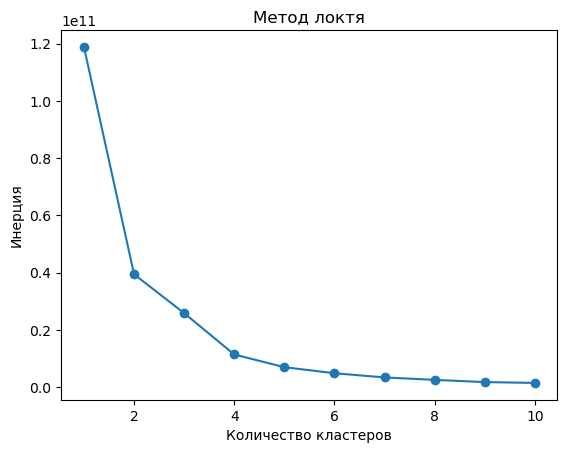

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv('Electric_Car.csv')
df = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'PriceEuro']]
print(df.head())
# print(df.info())
inertia = []
for k in range(1, 11):  # Пробуем от 1 до 10 кластеров
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

In [12]:
from numpy import linalg


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
norms = [linalg.norm(centroid) for centroid in centroids]
print(f'Норма вектора центров кластеров: {norms}')
print('Координаты центров кластеров:', centroids)
print(linalg.norm(centroids))

Норма вектора центров кластеров: [35853.888002199135, 197891.926256486, 116308.13772834408, 65050.92534581778]
Координаты центров кластеров: [[9.01967213e+00 1.54327869e+02 2.78196721e+02 3.58524754e+04]
 [2.45000000e+00 3.35000000e+02 6.72500000e+02 1.97890500e+05]
 [4.11818182e+00 2.34636364e+02 4.34090909e+02 1.16307091e+05]
 [5.56551724e+00 1.99724138e+02 4.07068966e+02 6.50493448e+04]]
241259.03413667093


In [44]:
import numpy as np
from sklearn.cluster import KMeans
from numpy import linalg


optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df)  # Обучаем модель на данных

centroids = kmeans.cluster_centers_  
norms = [linalg.norm(centroid) for centroid in centroids]

# Выводим результаты
print(f'Норма вектора центров кластеров: {norms}')
print('Координаты центров кластеров:', centroids)

# Преобразуем центры кластеров в одномерный вектор
centroids_flat = centroids.flatten()
print(linalg.norm(centroids))

# Рассчитываем норму этого вектора
norm_of_centroids_vector = linalg.norm(centroids_flat)

print(f'Норма полученного вектора: {norm_of_centroids_vector:.3f}')

sum_norms = sum(norms)
print(f'Сумма норм всех центров кластеров: {sum_norms:.3f}')

Норма вектора центров кластеров: [35853.888002199135, 197891.926256486, 116308.13772834408, 65050.92534581778]
Координаты центров кластеров: [[9.01967213e+00 1.54327869e+02 2.78196721e+02 3.58524754e+04]
 [2.45000000e+00 3.35000000e+02 6.72500000e+02 1.97890500e+05]
 [4.11818182e+00 2.34636364e+02 4.34090909e+02 1.16307091e+05]
 [5.56551724e+00 1.99724138e+02 4.07068966e+02 6.50493448e+04]]
241259.03413667093
Норма полученного вектора: 241259.034
Сумма норм всех центров кластеров: 415104.877


<h2> 4. Определение матрицы рейтингов с использованием SVD </h2>
Задание состоит в заполнении нулевых значений в матрице rating с использованием метода сингулярного разложения (SVD).

Исходная матрица rating представляет собой двумерный массив, содержащий оценки пользователей для определенных объектов. Однако в некоторых ячейках матрицы отсутствуют значения, обозначенные нулями.

Для заполнения этих нулевых значений используйте метод SVD — метод разложения матрицы на три составляющих: матрицу левых сингулярных векторов (U), матрицу сингулярных значений (S) и матрицу правых сингулярных векторов (V).

В результате выполнения программы будет получена матрица rating_prediction, в которой нулевые значения будут заменены предсказанными значениями с использованием SVD.

In [9]:
import numpy as np
from scipy.sparse.linalg import svds


ratings = np.array([[3, 1, 0, 1],
               	[0, 3, 0, 1],
               	[1, 2, 0, 5],
               	[1, 0, 0, 2],
               	[0, 1, 3, 1]]).astype(float)

#Далее запишите ваш код
U, S, Vt = svds(ratings, k=2)
S_diag = np.diag(S)
rating_prediction = np.dot(np.dot(U, S_diag), Vt)
rating_prediction

array([[ 1.3183674 ,  0.6341322 , -0.76682067,  1.95292953],
       [ 0.25769658,  1.34955709,  0.94417223,  1.73267927],
       [ 1.84666953,  2.40446815,  0.27938119,  4.4068027 ],
       [ 0.95743862,  0.68557226, -0.35599688,  1.66633836],
       [-0.79235923,  1.62553782,  2.25215506,  1.0381396 ]])

<h2> 5. Применение фильтра к изображению </h2>
Напишите программу, которая создает фильтр для изображения. Входные данные — изображение в виде матрицы image, где каждый элемент представляет собой пиксель изображения. 

Ваша задача — применить фильтр filter к изображению и выдать результат в виде новой матрицы feature_map.

In [10]:
import numpy as np

image = np.array([[1, 2, 1, 1, 3],
              	  [0, 1, 2, 3, 4],
              	  [0, 0, 1, 2, 3],
              	  [3, 2, 1, 5, 0],
              	  [1, 2, 3, 1, 7]])

filter = np.array([[1, 0, 1],
               	  [0, 1, 0],
               	  [1, 0, 1]])

#Далее запишите ваш код
feature_map = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        feature_map[i][j] = np.sum(image[i:i+3, j:j+3] * filter)
print(feature_map)

[[ 4.  7. 11.]
 [ 6. 12.  9.]
 [ 7.  6. 19.]]
